<a href="https://colab.research.google.com/github/LuvMutreja/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Regression_Project_Yes_Bank_Stock_Closing_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy.random import randn
from datetime import datetime
from datetime import date
from numpy import math
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 

### Dataset Loading

In [3]:
# Loading the Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Alma Better/Module 4 Machine Learning/#Capstone Projects/Regression Capstone Project- Yes Bank Stock Closing Price Prediction /data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


### What did you know about your dataset?

This dataset is a Time Series Dataset in which we have to predict the Closing Price of Yes Bank's stock. The dataset contains [Opening,Highest,Lowest,Closing] stock price from July 2005 - November 2020 i.e  14 years 8 months. Each month is represented by a row. The dataset has 185 rows and 5 columns.    

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
# Dataset Describe
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

1.Date- Month and Year for the corresponding record.

2.Open- Price at which the stock started trading when the market opened on 1st day of the month.

3.High- Highest price at which a stock traded during a period.

4.Low- Lowest price at which a stock traded during a period.

5.Close- Price at which last buy and sale order was executed between two traders on the last day of the month.

### Check Unique Values for each variable.

In [12]:
# Checking Unique Values for each variable.
for col in dataset.columns:
  print('Number of unique values in ',col,' is ',dataset[col].nunique())

Number of unique values in  Date  is  185
Number of unique values in  Open  is  183
Number of unique values in  High  is  184
Number of unique values in  Low  is  183
Number of unique values in  Close  is  185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Creating a function to convert date's value's datatype from string to a string that can be converted to datetime datatype
def date_to_str(l):
  s='1/'
  if 'Jan'in l[0]:
    s=s+'01/'
  elif 'Feb'in l[0]:
    s=s+'02/'
  elif 'Mar'in l[0]:
    s=s+'03/'
  elif 'Apr'in l[0]:
    s=s+'04/'
  elif 'May'in l[0]:
    s=s+'05/'
  elif 'Jun'in l[0]:
    s=s+'06/'
  elif 'Jul'in l[0]:
    s=s+'07/'
  elif 'Aug'in l[0]:
    s=s+'08/'
  elif 'Sep'in l[0]:
    s=s+'09/'
  elif 'Oct'in l[0]:
    s=s+'10/'
  elif 'Nov'in l[0]:
    s=s+'11/'
  elif 'Dec'in l[0]:
    s=s+'12/'    
  s=s+l[1]
  return s                   

In [14]:
# creating a new column by using the original Date column and applying the above created funtion on it 
dataset['date']=dataset.apply(lambda x1:date_to_str(x1['Date'].split('-')),axis=1)

In [15]:
# checking if function worked as desired or not 
dataset[:20]

,Date,Open,High,Low,Close,date
0,Jul-05,13.00,14.00,11.25,12.46,1/07/05
1,Aug-05,12.58,14.88,12.55,13.42,1/08/05
2,Sep-05,13.48,14.87,12.27,13.30,1/09/05
3,Oct-05,13.20,14.47,12.40,12.99,1/10/05
4,Nov-05,13.35,13.88,12.88,13.41,1/11/05
5,Dec-05,13.49,14.44,13.00,13.71,1/12/05
6,Jan-06,13.68,17.16,13.58,15.33,1/01/06
7,Feb-06,15.50,16.97,15.40,16.12,1/02/06
8,Mar-06,16.20,20.95,16.02,20.08,1/03/06
9,Apr-06,20.56,20.80,18.02,19.49,1/04/06


In [16]:
# dropping the orignal Date column
dataset.drop(['Date'],axis=1,inplace=True)

In [17]:
# checking if column was actually dropped or not
dataset

,Open,High,Low,Close,date
0,13.00,14.00,11.25,12.46,1/07/05
1,12.58,14.88,12.55,13.42,1/08/05
2,13.48,14.87,12.27,13.30,1/09/05
3,13.20,14.47,12.40,12.99,1/10/05
4,13.35,13.88,12.88,13.41,1/11/05
...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,1/07/20
181,12.00,17.16,11.85,14.37,1/08/20
182,14.30,15.34,12.75,13.15,1/09/20
183,13.30,14.01,12.11,12.42,1/10/20


In [18]:
# creating a new column by using the string date column and converting it to datetime datatype column
dataset['Date']= dataset['date'].apply(lambda x2:datetime.strptime(x2,'%d/%m/%y')) 

In [19]:
# checking the datatype of the newly created column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    185 non-null    float64       
 1   High    185 non-null    float64       
 2   Low     185 non-null    float64       
 3   Close   185 non-null    float64       
 4   date    185 non-null    object        
 5   Date    185 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 8.8+ KB


In [20]:
# checking if new column was created as desired or not
dataset[:20]

,Open,High,Low,Close,date,Date
0,13.00,14.00,11.25,12.46,1/07/05,2005-07-01
1,12.58,14.88,12.55,13.42,1/08/05,2005-08-01
2,13.48,14.87,12.27,13.30,1/09/05,2005-09-01
3,13.20,14.47,12.40,12.99,1/10/05,2005-10-01
4,13.35,13.88,12.88,13.41,1/11/05,2005-11-01
5,13.49,14.44,13.00,13.71,1/12/05,2005-12-01
6,13.68,17.16,13.58,15.33,1/01/06,2006-01-01
7,15.50,16.97,15.40,16.12,1/02/06,2006-02-01
8,16.20,20.95,16.02,20.08,1/03/06,2006-03-01
9,20.56,20.80,18.02,19.49,1/04/06,2006-04-01


In [21]:
# dataset's duration 
print(f'DataFrame contains stock prices from {dataset.Date.min()} to {dataset.Date.max()}')

DataFrame contains stock prices from 2005-07-01 00:00:00 to 2020-11-01 00:00:00


In [22]:
# dataset's days
print(f'DataFrame contains stock prices for {dataset.Date.max()-dataset.Date.min()} days'[:-14])

DataFrame contains stock prices for 5602 days


In [23]:
# creating a new column month 
dataset['Month']= dataset['Date'].apply(lambda x4:x4.month)

In [24]:
# creating a new column Year
dataset['Year'] = dataset['Date'].apply(lambda x3: x3.year)

In [25]:
# checking if month and year columns were created as desired or not
dataset[:20]

,Open,High,Low,Close,date,Date,Month,Year
0,13.00,14.00,11.25,12.46,1/07/05,2005-07-01,7,2005
1,12.58,14.88,12.55,13.42,1/08/05,2005-08-01,8,2005
2,13.48,14.87,12.27,13.30,1/09/05,2005-09-01,9,2005
3,13.20,14.47,12.40,12.99,1/10/05,2005-10-01,10,2005
4,13.35,13.88,12.88,13.41,1/11/05,2005-11-01,11,2005
5,13.49,14.44,13.00,13.71,1/12/05,2005-12-01,12,2005
6,13.68,17.16,13.58,15.33,1/01/06,2006-01-01,1,2006
7,15.50,16.97,15.40,16.12,1/02/06,2006-02-01,2,2006
8,16.20,20.95,16.02,20.08,1/03/06,2006-03-01,3,2006
9,20.56,20.80,18.02,19.49,1/04/06,2006-04-01,4,2006


In [26]:
# dropping the date column whose datatype was string 
dataset.drop(['date'],inplace=True,axis=1)

In [27]:
# checking if column was dropped or not 
dataset

,Open,High,Low,Close,Date,Month,Year
0,13.00,14.00,11.25,12.46,2005-07-01,7,2005
1,12.58,14.88,12.55,13.42,2005-08-01,8,2005
2,13.48,14.87,12.27,13.30,2005-09-01,9,2005
3,13.20,14.47,12.40,12.99,2005-10-01,10,2005
4,13.35,13.88,12.88,13.41,2005-11-01,11,2005
...,...,...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,2020-07-01,7,2020
181,12.00,17.16,11.85,14.37,2020-08-01,8,2020
182,14.30,15.34,12.75,13.15,2020-09-01,9,2020
183,13.30,14.01,12.11,12.42,2020-10-01,10,2020


The columns which are useful for our model are [Open,High,Low,Close]. Each row represents a month, so there is a possibility that nth month's closing stock can be opening stock for n+1th month. **Let's check that out**     

In [165]:
# creating a function to compare nth record of a list with n+1th record of another list
def comparing_with_next_record_of_another_list(l1,l2):
  l1=l1[:-1]
  l2=l2[1:] 
  l3=list(zip(l1,l2))
  df=pd.DataFrame(l3,columns=['Closing Price','Opening Price'],index=dataset['Date'][:-1])
  return df    

In [166]:
# applying the above created function
comparing_nthcp_with_n_minus_1thop=comparing_with_next_record_of_another_list(dataset['Close'].tolist(),dataset['Open'].tolist())

In [167]:
# viewing the dataframe created from above function
comparing_nthcp_with_n_minus_1thop

,Closing Price,Opening Price
Date,,
2005-07-01,12.46,12.58
2005-08-01,13.42,13.48
2005-09-01,13.30,13.20
2005-10-01,12.99,13.35
2005-11-01,13.41,13.49
...,...,...
2020-06-01,25.60,25.60
2020-07-01,11.95,12.00
2020-08-01,14.37,14.30


In [31]:
# using the pandas diff function to view the difference in stock's closing price from the last month's stock's closing price 
change_in_csp = dataset['Close'].diff()  

In [32]:
# viewing the difference in stock's closing price from the last month's stock's closing price 
print(type(change_in_csp))
change_in_csp

<class 'pandas.core.series.Series'>


0        NaN
1       0.96
2      -0.12
3      -0.31
4       0.42
       ...  
180   -13.65
181     2.42
182    -1.22
183    -0.73
184     2.25
Name: Close, Length: 185, dtype: float64

Resample in pandas is a method for frequency conversion and resampling of time series. **Let's use that in our dataset** 

In [33]:
# setting the date column as index and using the resample method to get quarter based dataset
quarterly = dataset.set_index(['Date']).resample('Q').mean()

In [34]:
# viewing the quarter based dataset
quarterly

,Open,High,Low,Close,Month,Year
Date,,,,,,
2005-09-30,13.020000,14.583333,12.023333,13.060000,8.0,2005.0
2005-12-31,13.346667,14.263333,12.760000,13.370000,11.0,2005.0
2006-03-31,15.126667,18.360000,15.000000,17.176667,2.0,2006.0
2006-06-30,19.520000,20.333333,15.740000,17.713333,5.0,2006.0
2006-09-30,16.633333,18.226667,15.440000,17.486667,8.0,2006.0
...,...,...,...,...,...,...
2019-12-31,61.000000,74.166667,43.233333,61.900000,11.0,2019.0
2020-03-31,40.400000,59.050000,25.233333,32.066667,2.0,2020.0
2020-06-30,25.950000,31.333333,23.683333,26.800000,5.0,2020.0


In [35]:
# setting the date column as index and using the resample method to get year based dataset
yearly= dataset.set_index(['Date']).resample('Y').mean()

In [36]:
# viewing the year based dataset
yearly

,Open,High,Low,Close,Month,Year
Date,,,,,,
2005-12-31,13.183333,14.423333,12.391667,13.215000,9.5,2005.0
2006-12-31,18.401667,21.090833,16.903333,19.350000,6.5,2006.0
2007-12-31,35.160833,39.743333,31.830000,36.873333,6.5,2007.0
2008-12-31,31.292500,34.330833,23.335000,28.252500,6.5,2008.0
2009-12-31,26.940833,32.678333,24.275833,30.032500,6.5,2009.0
2010-12-31,57.946667,63.508333,53.880833,58.645833,6.5,2010.0
2011-12-31,58.865000,63.341667,52.275833,57.223333,6.5,2011.0
2012-12-31,70.648333,77.577500,67.428333,74.281667,6.5,2012.0
2013-12-31,82.608333,92.748333,72.990833,80.585000,6.5,2013.0


In [37]:
# checking the shape of year based dataset 
yearly.shape

(16, 6)

### What all manipulations have you done and insights you found?

1. The first manipulation that i did was converting the date column's datatype to datetime datetype so that pandas' datetime functions and methods can be used on it. Insights I obtained from this manipulation are :-
* Found the entire duration of the dataset.
* Found the number of days of the dataset.
* Extracted month from the date to do futher manipualtions.
* Extracted year from the date to do futher manipualtions  
2. The second manipulation that i did was creating a function to compare nth record of a list with n+1th record of another list. Insights I obtained from this manipulation :-
* Applied this function on Open and Close columns of the dataset to check if last month's closing price is this month's opening price or not. Found out that they are not same but numerically are very close to each other. 
3. The third manipulation that i did was using the diff method on the Close column of the dataset. Insights I obtained from this manipulation:-
* This method hepled me check how different this month's stock's closing price is from last month's closing price. 
4. The fourth manipulation that i did was using the resample method to convert the frequency of the dataset. Insights I obtained from this manipulation :-
* Resampled the data and converted it to quarter based records. To see the quarterly trends.
* Resampled the data and converted it to year based records. To see the yearly trends.    

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### 1st Chart - Line Plot to study Stock's Closing Price's Trend for the entire duration

In [38]:
# plotting the chart
px.line(dataset,x='Date',y='Close',title="Stock's Closing Price's Trend for the entire duration" )

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to study the dependent/target variables' Trend for the entire duration of the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-
*   The Stock's Closing Price on July 2005 and on November 2020 are almost same.
*   The Stock's Price was on its peak during July 2017 to July 2018.
*   After July 2018 the Stock's Price fell tremendously till Sept 2018.
*   After March 2019 the Stock's Price continuously fell.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Poor Financial Management: Failing to properly manage finances is one of the main reasons businesses fail. Not keeping track of expenses, not monitoring cash flow, and not creating a financial plan can quickly lead to a negative financial situation.  

#### 2nd Chart - Bar Chart depicting Closing Stock Price for each Year

In [39]:
# plotting the chart
px.bar(dataset,x='Year',y='Close',color='Month',title='Closing Stock Price for each Year')

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to find  in which year Stock's Price was maximum and in which year Stock's Price was minimum. 

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-
*   The Stock Price was highest in the year 2017. 
*   The Stock Price was lowest in the year 2005. This is also because the data given to us is not for complete 2005 it is only given from July onwards.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Lack of Innovation: In today's fast-paced business environment, it's essential to innovate and stay ahead of the competition. Failing to do so can lead to a decline in sales, customer loss, and ultimately, negative business growth.

#### 3rd Chart - Scatter Plot showing Closing Stock Price for each Month

In [40]:
# plotting the chart
px.scatter(dataset, x="Month", y="Close",size="Open", color='Year', title='Closing Stock Price for each Month')

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to see in which month Stock's Price was maximum and in which month Stock's Price was minimum. This plot also shows some irregular behaviour present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-
* The Stock Price was highest in the 7th month i.e July. 
* The Stock Price was lowest in the 11th month i.e November.
* The irregularity present in the data. Like:-
  
  => In the 4th month of 2019 the Stock's Opening Price was 277 but the Closing Price was 168.
  
  => In the 9th month of 2018 the Stock's Opening Price was 347 but the Closing Price was 183.

     **Which was not the case for rest of the datapoints. Where if the Opening Price was high the Closing Price was also most likely to be high.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Poor Customer Service: Customers are the lifeblood of any business. Poor customer service can quickly lead to a loss of customers and negative reviews, which can impact your business's reputation and lead to negative growth.

#### 4th Chart - Bar Chart to compare Opening Stock Price with last month's Closing Stock Price

Earlier i created a function to check if nth month stock's closing price is similar to stock's opening price for n+1th month and created a dataframe. Which i will now used to check if nth month stock's closing price is similar to stock's opening price for n+1th month.

In [168]:
# plotting the chart
px.bar(comparing_nthcp_with_n_minus_1thop,barmode='group',width=6000, height=500,title="Comparing Opening Stock Price with last month's Closing Stock Price")

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to compare Opening Stock Price with last month's Closing Stock Price.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-
* The nth month's Stock's Opening Price is not exactly same as n-1th month's  Stock's Closing Price.
* They are not exactly same but numerically are very close to each other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Failure to Adapt to Changes: The business landscape is constantly evolving, and businesses that fail to adapt to changes can quickly become obsolete. Stagnant business strategies can lead to negative growth and eventual failure.

#### 5th Chart - Line Plot showing how much Stock's Opening Price has changed from last month's Closing Price


In [45]:
# using the pandas diff method on the dataframe created using the function to do the needful 
comparing_nthcp_with_n_minus_1thop.diff(1,axis=1)

,Closing Price,Opening Price
0,NaN,0.12
1,NaN,0.06
2,NaN,-0.10
3,NaN,0.36
4,NaN,0.08
...,...,...
179,NaN,0.00
180,NaN,0.05
181,NaN,-0.07
182,NaN,0.15


In [169]:
# plotting the chart
px.line(comparing_nthcp_with_n_minus_1thop.diff(1,axis=1),title=" Change in Opening Stock Price from last month's Closing Stock Price (nth Osp - n-1th Csp) ").update_layout(showlegend=False)

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to see how much Stock's Opening Price has changed from last month's Closing Price.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-
* The nth month's Stock's Opening Price is not exactly same as n-1th month's Stock's Closing Price.
* They are not exactly same but numerically are very close to each other.
* The maximum deviation of Stock's Opening Price from last month Closing Price is -4.7 .
  
  => From this we can make out that there is very little differnece between Stock's last month's Closing Price and Opening Price. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Ineffective Marketing: Ineffective marketing can result in low sales and a lack of brand awareness. Without effective marketing strategies, businesses may fail to reach their target audience, which can lead to negative growth.

#### 6th Chart - Line Plot to evaluate the change in Stock's Closing Price from the last month's Stock's Closing Price

In [158]:
# plotting the chart
px.line(change_in_csp,title="Evaluating the change in Stock's Closing Price from the last month's Stock's Closing Price")

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to evaluate the change in Stock's Closing Price from the last month's Stock's Closing Price.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Poor market research: If a business fails to conduct adequate market research before launching a new product or service, they may end up investing time and money into a product that does not meet the needs or wants of their target audience.


#### 4th Chart - Change in Average Closing Stock Price from Last Year's Average Closing Stock Price

Earlier i created a yearly dataframe using pandas resample function. **Lets use that dataframe with the pandas diff method and see what happens.**

In [155]:
# using diff method on the resampled yearly dataframe and viweing the results
yearly.diff(1)

,Open,High,Low,Close,Month,Year
Date,,,,,,
2005-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,5.218333,6.667500,4.511667,6.135000,-3.0,1.0
2007-12-31,16.759167,18.652500,14.926667,17.523333,0.0,1.0
2008-12-31,-3.868333,-5.412500,-8.495000,-8.620833,0.0,1.0
2009-12-31,-4.351667,-1.652500,0.940833,1.780000,0.0,1.0
2010-12-31,31.005833,30.830000,29.605000,28.613333,0.0,1.0
2011-12-31,0.918333,-0.166667,-1.605000,-1.422500,0.0,1.0
2012-12-31,11.783333,14.235833,15.152500,17.058333,0.0,1.0
2013-12-31,11.960000,15.170833,5.562500,6.303333,0.0,1.0


In [160]:
# plotting the chart
px.line(yearly.diff(1),x=yearly.index,y='Close', title="Change in Average Closing Stock Price from Last Year's Average Closing Stock Price")

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to see the Change in Average Closing Stock Price from Last Year's Average Closing Stock Price.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-
*  Till 2008 the average of Closing Stock's Price was incrementing.
    
  => Then it decreased a little in 2008.
    
  => Then it kept on incrementing till 2017 with little fluctuations.

  => And then it kept on decreasing.
       **You must be seeing a strange behaviour in the line at during 2020. That is because the decrease from 2019 to 2020 is bigger than the one which is during 2020.** 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Inefficient operations: If a business does not have efficient systems and processes in place, they may waste time and resources on tasks that could be streamlined, leading to decreased productivity and profitability.

#### 5th Chart - 

In [47]:
# Chart - 12 visualization code
px.scatter(quarterly,x=['Open','High','Low'],y='Close')

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is: 
* Ineffective marketing and sales strategies: If a business fails to effectively market and sell their products or services, they may struggle to generate revenue and attract new customers.


#### Chart - 13

In [48]:
# Chart - 13 visualization code
px.line(yearly[['Open','High','Low','Close']])

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Lack of employee engagement and retention: If a business does not prioritize employee engagement and retention, they may struggle to attract and retain talented staff, leading to decreased productivity and innovation.

#### 5th Chart - BoxPlot showcasing the outliers

In [42]:
# plotting the chart
px.box(dataset[['Open','High','Low','Close']],points='all')

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Ineffective leadership: Poor leadership can result in a lack of direction and focus, which can lead to missed opportunities and a decline in performance.


#### Chart - 14

In [49]:
# Chart - 12 visualization code
px.pie(dataset ,values=dataset[['Open','High','Low','Close']].mean(),names=dataset.columns[:-3], title='Mean Values of [Open,High,Low,Close]',width=400,height=400)

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Operational inefficiencies: If a business has inefficient processes and procedures, it may struggle to meet customer demand and control costs, which can lead to declining profits.


#### 12th Chart - 

In [50]:
# Chart - 5 visualization code
px.scatter(dataset,x='Open',y='Close',size='High',trendline='ols',trendline_color_override='black', title='')

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. One is:
* Excessive Debt: Taking on too much debt can put a significant strain on a business's finances and limit its ability to invest in growth opportunities. If a business fails to manage its debt properly, it can quickly spiral out of control and lead to bankruptcy.

#### 13th Chart - 

In [51]:
# Chart - 6 visualization code
px.scatter(dataset,x='High',y='Close',size='Open',trendline='ols',trendline_color_override='black')

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth.
It's essential to stay on top of your business's financials, innovate, prioritize customer service, have effective marketing strategies, and be open to change to avoid negative business growth.

#### 14th Chart - 

In [52]:
# Chart - 7 visualization code
px.scatter(dataset,x='Low',y='Close',size='Open',trendline='ols',trendline_color_override='black')

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained will insights help in creating a positive business impact.

Yes, there are several insights that can lead to negative business growth. It's important for businesses to identify and address any issues that may be hindering their growth in order to remain competitive and successful. If a business fails to do so then obviously it will lead the business towards negative growth.

#### Chart - 15 - Correlation Heatmap

In [53]:
# Correlation Heatmap visualization code

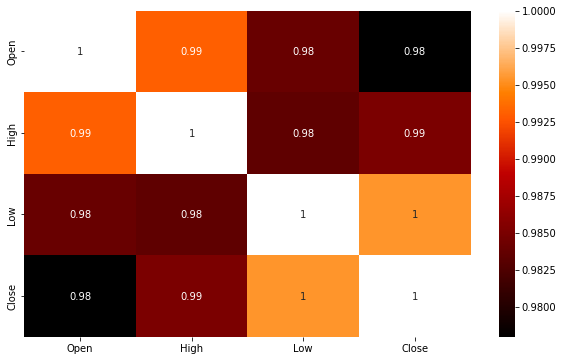

In [54]:
plt.rcParams['figure.figsize'] = (10,6)
correlation=dataset[['Open','High','Low','Close']].corr()
sns.heatmap(correlation,annot=True,cmap='gist_heat')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

#### Chart - 16 - Pair Plot 

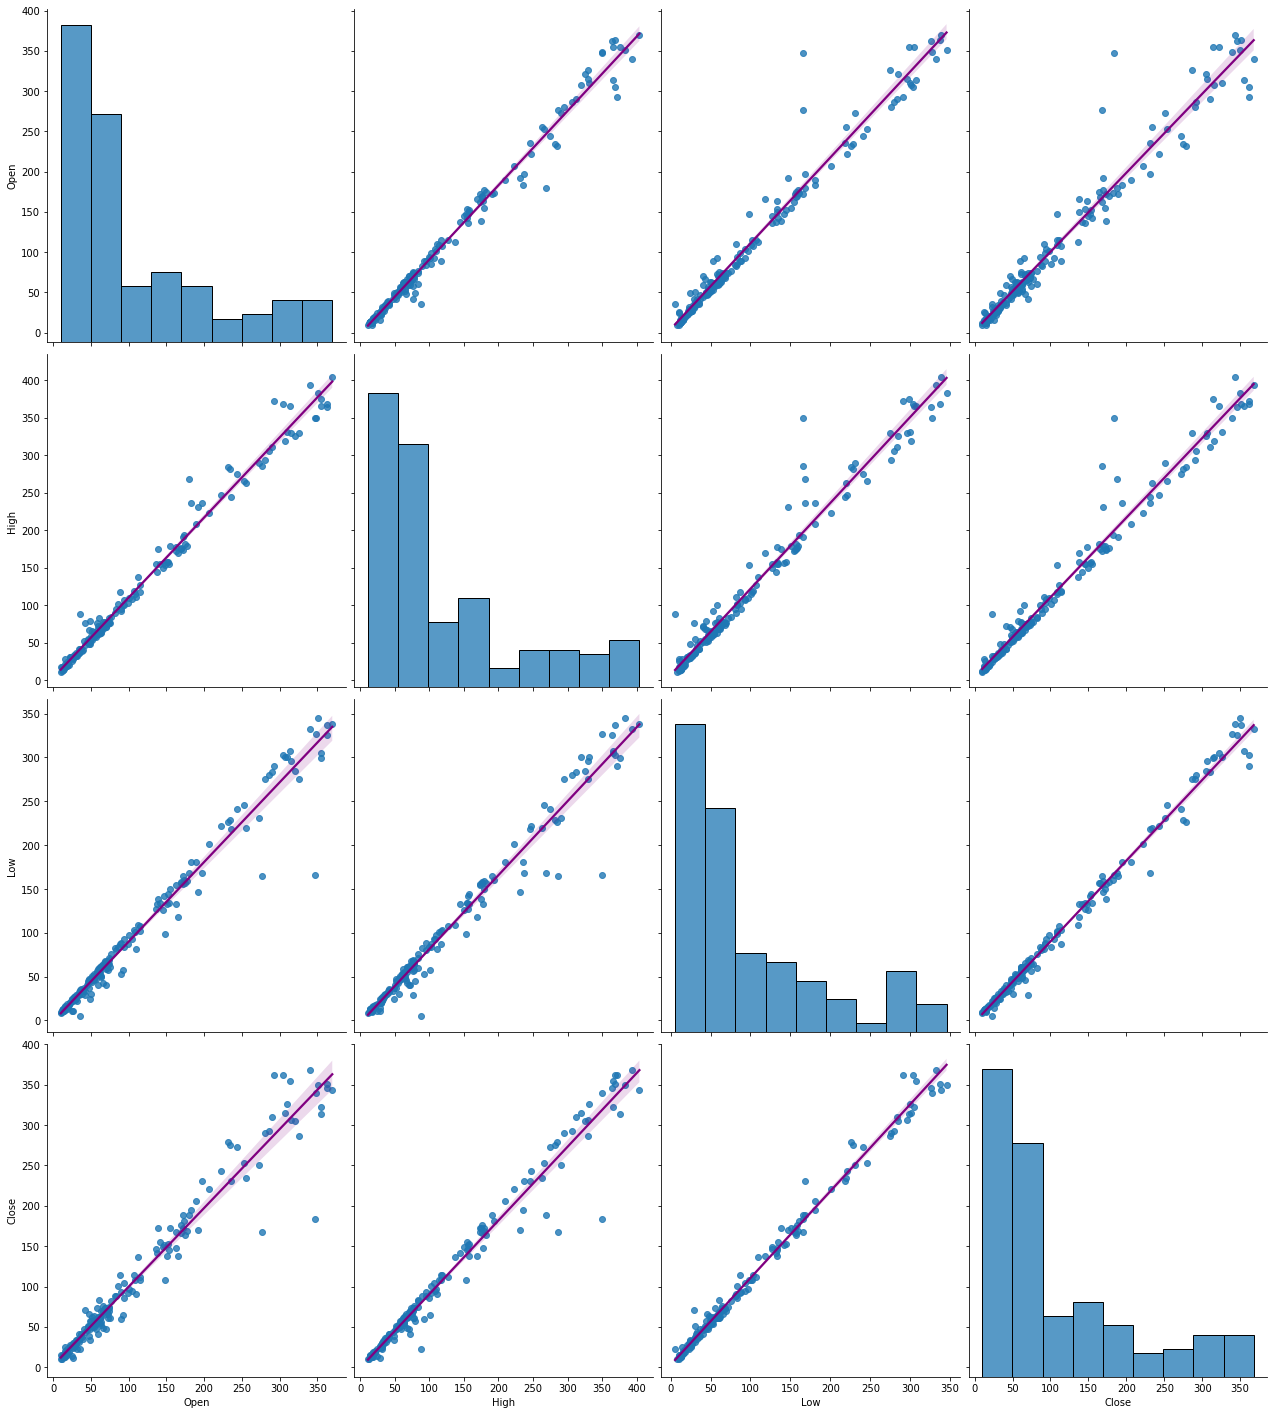

In [55]:
# Pair Plot visualization code
sns.pairplot(dataset,x_vars=['Open','High','Low','Close'],y_vars=['Open','High','Low','Close'],kind='reg',size=5, aspect=0.9,
             plot_kws={'line_kws':{'color':'purple'}})
plt.show()

##### 1. Why did you pick the specific chart?

I chose this specific chart because it enables me to

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from this chart are:-

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Closing Stock Price follows a normal distribution


---


2. Sample mean and population mean are same


---


3. Independent and dependent variables are not correlated i.e. 
There is no statistically significant relationship between the predictor variable, x, and the response variable, y.

### Hypothetical Statement - 1


---


Closing Stock Price follows a normal distribution 

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Closing stock price follows a normal distribution. 

Alternate Hypothesis : Closing stock price does not follow a normal distribution.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value
data_to_test = dataset['Close']
stat,p_value = shapiro(data_to_test)
print(round(stat,5),round(p_value,30))
if p_value>0.05:
  print('We fail to reject null hypothesis as the target variable is Normally Distributed')
else:
  print('We reject null hypothesis as the target variable is not Normally Distributed')  

0.81698 5.694285375255209e-14
We reject null hypothesis as the target variable is not Normally Distributed


In [57]:
data_to_test=randn(100)
stat,p_value1 = shapiro(data_to_test)
print(round(stat,5),round(p_value1,30))
if p_value1>0.05:
  print('We fail to reject null hypothesis as the target variable is Normally Distributed')
else:
  print('We reject null hypothesis as the target variable is not Normally Distributed')

0.96872 0.017653074115514755
We reject null hypothesis as the target variable is not Normally Distributed


##### Which statistical test have you done to obtain P-Value?

Used shapiro (a built in function of scipy library) to obtain the P value. 

##### Why did you choose the specific statistical test?

I used shapiro because it is used to check if a perticular thing(closing stock price in this case) is normally disrtributed or not. 

### Hypothetical Statement - 2


---


Sample mean and population mean are same

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Sample mean and population mean are same

Alternate Hypothesis : Sample mean and population mean are not same

#### 2. Perform an appropriate statistical test.

In [58]:
# Perform Statistical Test to obtain P-Value
population= dataset['Close'].values
len(population)

185

In [59]:
sample_size=18
population_sample= np.random.choice(population,sample_size)
population_sample

array([168.  ,  88.14,  60.07,  94.5 ,  62.54,  15.03, 322.25,  25.45,
        66.02, 183.45,  31.13,  71.86,  22.85, 163.31, 100.28, 108.21,
       234.28,  13.3 ])

In [60]:
ttest,p_value2 = ttest_1samp(population_sample,population.mean())
print(round(ttest,5),round(p_value2,10))
if p_value2>0.05:
  print('We fail to reject null hypothesis')
else:
  print('We reject null hypothesis')

-0.17742 0.8612770859
We fail to reject null hypothesis


In [61]:
print(population.mean(),population_sample.mean())

105.2047027027027 101.70388888888888


##### Which statistical test have you done to obtain P-Value?

used T Test to obtain the p value

##### Why did you choose the specific statistical test?

Because i wanted to check if popualtion and sample mean are same or not and T test fulfils this purpose  

### Hypothetical Statement - 3


---


Independent and dependent variables are not correlated i.e. 
There is no statistically significant relationship between the predictor variable, x, and the response variable, y.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Independent and dependent variables are not correlated 

Alternate Hypothesis : Independent and dependent variables are correlated

#### 2. Perform an appropriate statistical test.

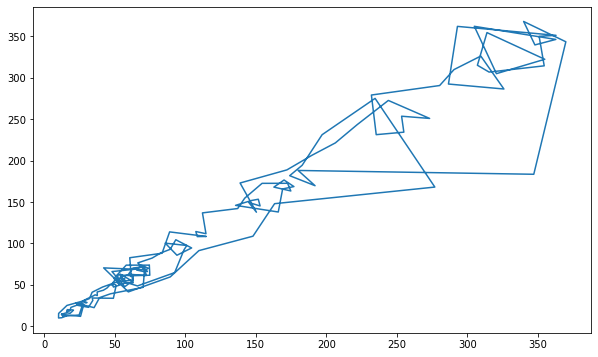

In [62]:
# Perform Statistical Test to obtain P-Value
independent_variables = dataset['Open']
dependent_variable= dataset['Close']
plt.plot(independent_variables,dependent_variable)
plt.show()

In [63]:
stat,p_value3 = pearsonr(independent_variables,dependent_variable)
print(round(stat,5),round(p_value3,126))
if p_value3>0.05:
  print('We fail to reject null hypothesis as there is no statistically significant relationship between the independent variable and the dependent variable.')
else:
  print('We reject null hypothesis as as there is significant relationship between the independent variable and the dependent variable.')

0.97797 1.999999999999999e-126
We reject null hypothesis as as there is significant relationship between the independent variable and the dependent variable.


##### Which statistical test have you done to obtain P-Value?

Pearson's correlation test

##### Why did you choose the specific statistical test?

Because it finds if the independent and the dependent variables are correlated or not 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

In [64]:
dataset.isnull().sum()

Open     0
High     0
Low      0
Close    0
Date     0
Month    0
Year     0
dtype: int64

As we can see there are no missing values in this dataset

### 2. Handling Outliers

In [65]:
# Handling Outliers & Outlier treatments
px.box(dataset[['Open','High','Low','Close']],points='all')

In [66]:
px.box(np.log(dataset[['Open','High','Low','Close']]),points='all')

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used log transfromation technique because my data was right skewed and so log transfromation served 2 purpose


*   Normalized the data (Transformed the data from right skewed to normal distribution)
*   Removed Outliers



### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

No categorical data was present in this dataset

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

No textual data was present in this dataset

### 5. Data Transformation

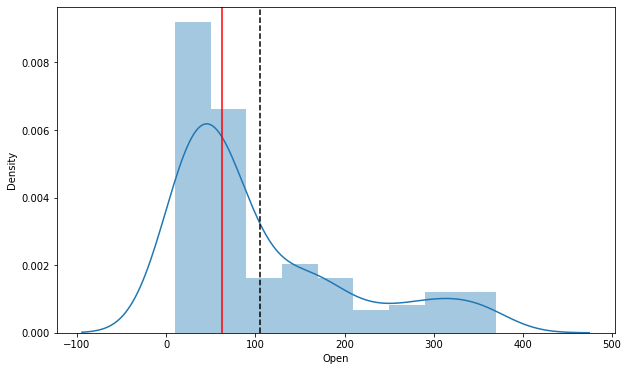

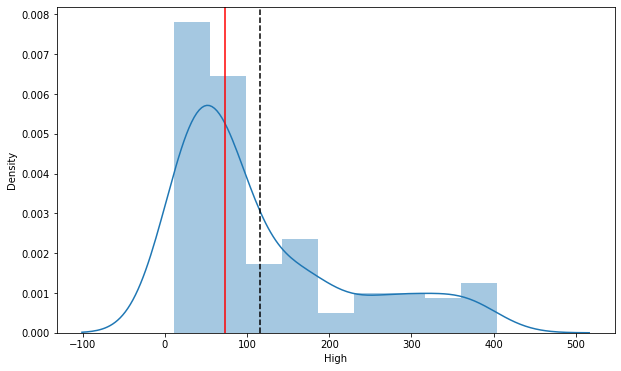

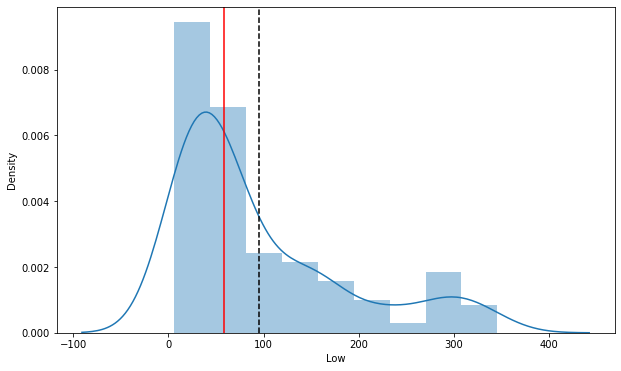

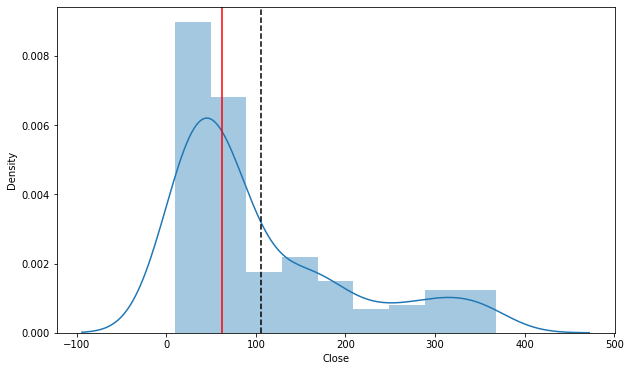

In [67]:
# Checking the distribution followed by Open,High,Low,Close columns/fetures of the dataset
plt.rcParams['figure.figsize'] = (10,6)
for col in dataset.columns[:-3]:
  sns.distplot(dataset[col])
  plt.axvline(dataset[col].mean(),color='black',linestyle='--')
  plt.axvline(dataset[col].median(),color='red',ls='solid')
  plt.show()

As we can see the distribution followed by the features is not normal. Therefore, transformation of the features will be required so that we can apply linear models on it. 

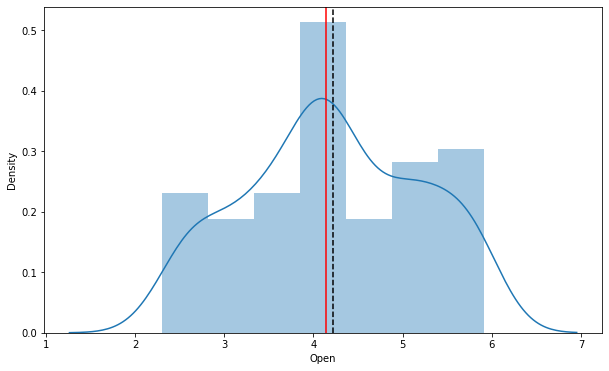

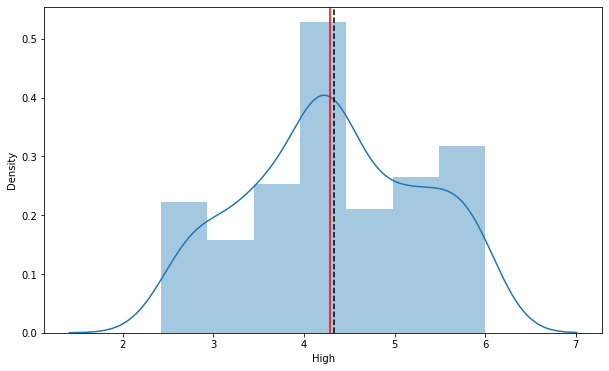

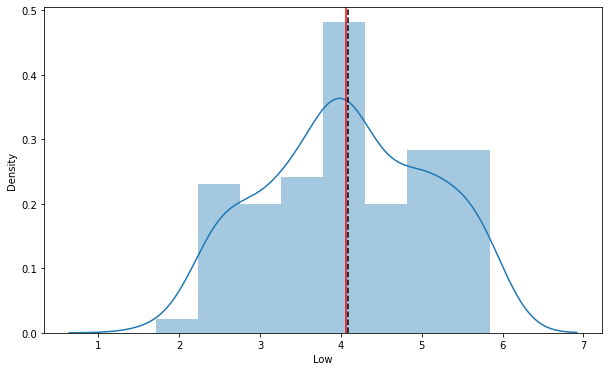

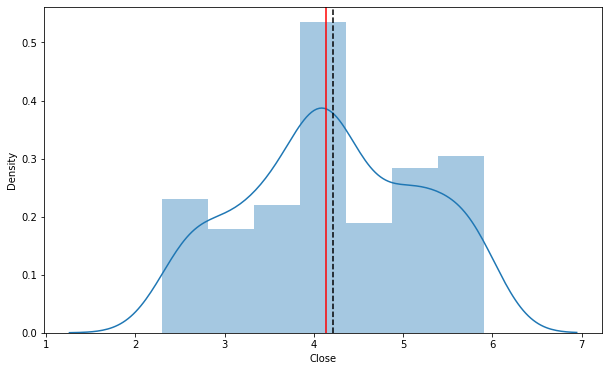

In [68]:
# Transfroming the distribution and making the features normally distributed
for col in dataset.columns[:-3]:
  sns.distplot(np.log(dataset[col]))
  plt.axvline(np.log(dataset[col]).mean(),color='black',ls='--')
  plt.axvline(np.log(dataset[col]).median(),color='red',ls='solid')
  plt.show()

In [69]:
# creating a copy of the dataset in which we will store normally distributed columns
dataset1=dataset.copy()

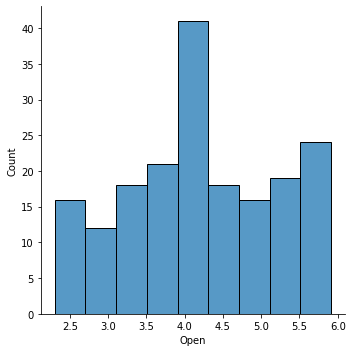

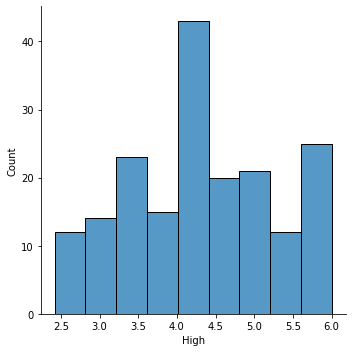

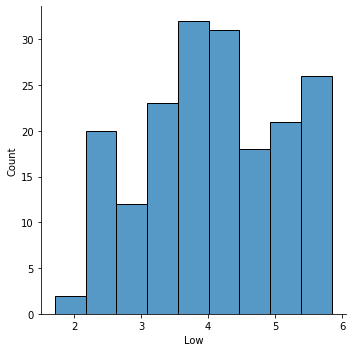

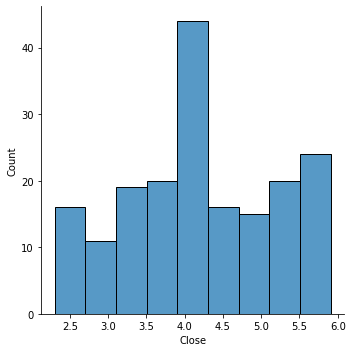

In [70]:
# storing normally distributed columns in the copy of dataset created earlier and viewing the distribution of each column
for col in dataset.columns[:-3]:
  dataset1[col]=np.log(dataset[col])
  sns.displot(dataset1[col])
  plt.show()

In [71]:
# viewing the difference of values in the orignal dataset and
dataset.head()

,Open,High,Low,Close,Date,Month,Year
0,13.00,14.00,11.25,12.46,2005-07-01,7,2005
1,12.58,14.88,12.55,13.42,2005-08-01,8,2005
2,13.48,14.87,12.27,13.30,2005-09-01,9,2005
3,13.20,14.47,12.40,12.99,2005-10-01,10,2005
4,13.35,13.88,12.88,13.41,2005-11-01,11,2005


In [72]:
# the copy of the the orignal dataset which contains normally distributed values 
dataset1.head()

,Open,High,Low,Close,Date,Month,Year
0,2.564949,2.639057,2.420368,2.522524,2005-07-01,7,2005
1,2.532108,2.700018,2.529721,2.596746,2005-08-01,8,2005
2,2.601207,2.699346,2.507157,2.587764,2005-09-01,9,2005
3,2.580217,2.672078,2.517696,2.564180,2005-10-01,10,2005
4,2.591516,2.630449,2.555676,2.596001,2005-11-01,11,2005


In [73]:
# comparing the orignal features with  
px.scatter(dataset[['Open','High','Low','Close']])

In [74]:
# the normally distributed features through scatter plots
px.scatter(dataset1[['Open','High','Low','Close']])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, this data required to be transformed. I have used log transformation to transform the data and make it normally distributed. I have used this perticular transformation technique because the data was moderately skewed when data is moderately skewed log transformation is very useful, and log transformation also helped in removing the outliers form the data.   

### 6. Data Scaling

Data scaling was not required in this dataset as  there is no scaling problem among the columns of this dataset. The colummns [Open,High,Low,Close] have values very closely related to each other as they consist Opening,Highest,Lowest,Closing Stock's Price for that perticular month . There is/are no such column/s whose coefficient differs hugely from others.  

### 7. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [75]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [76]:
dataset.corr()

,Open,High,Low,Close,Month,Year
Open,1.000000,0.993040,0.983978,0.977971,-0.034239,0.624325
High,0.993040,1.000000,0.983422,0.985051,-0.042511,0.638603
Low,0.983978,0.983422,1.000000,0.995358,-0.041818,0.599056
Close,0.977971,0.985051,0.995358,1.000000,-0.055796,0.608408
Month,-0.034239,-0.042511,-0.041818,-0.055796,1.000000,-0.063055
Year,0.624325,0.638603,0.599056,0.608408,-0.063055,1.000000


In [77]:
def calc_vif(dataset):
  Vif=pd.DataFrame()
  Vif['features']=dataset.columns
  Vif['vif value'] =[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return Vif 

In [78]:
calc_vif(dataset[dataset.columns[:-4]])

,features,vif value
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [79]:
dataset1[['Open','High','Low','Close']].corr().Close

Open     0.984701
High     0.987019
Low      0.990511
Close    1.000000
Name: Close, dtype: float64

In [80]:
# Select your features wisely to avoid overfitting

In [81]:
x= dataset1[['Open','High','Low']]
y= dataset1['Close']

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2510)
print(x_train.shape)
print(x_test.shape)

(129, 3)
(56, 3)


In [83]:
lasso=Lasso(alpha=0.1,max_iter=2000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1, max_iter=2000)

In [84]:
lasso.intercept_

0.5708797556060516

In [85]:
lasso.coef_

array([0.        , 0.11987301, 0.76392105])

In [86]:
y_pred_train = lasso.predict(x_train) 

In [87]:
y_pred=lasso.predict(x_test)

In [88]:
r2_score(y_train,y_pred_train)

0.9814074869250103

In [89]:
r2_score(y_test,y_pred)

0.9701161519428865

In [90]:
n=x.shape[0]
p=x.shape[1]
print(n,p)

185 3


In [91]:
1-(1-r2_score(y_train,y_pred_train))*(n-1)/(n-p-1)

0.9810993237248724

In [92]:
1-(1-r2_score(y_train,y_pred_train))*(n-1)/(n-p-1)

0.9810993237248724

In [93]:
f_regression(x,y)[1].round(100)

array([0., 0., 0.])

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [94]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

In [95]:
# Split your data to train and test. Choose Splitting ratio wisely.


##### What data splitting ratio have you used and why? 

I have chosen 70-30 split 

## ***7. ML Model Implementation***

### 1st ML Model - Linear Regression

In [96]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [97]:
print(x_train.shape)
print(x_test.shape)

(129, 3)
(56, 3)


In [98]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [99]:
lr.intercept_

0.009990647148155674

In [100]:
lr.coef_

array([-0.6534344 ,  0.81568721,  0.83733993])

In [101]:
y_pred_train_lr= lr.predict(x_train)

In [102]:
y_pred_lr=lr.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [103]:
def em_series_train_test(y_train,y_pred_train,y_test,y_pred,name1,name2):  
  r2_train=r2_score(y_train,y_pred_train)
  r2_test=r2_score(y_test,y_pred)
  adj_r2_train=1-(1-r2_score(y_train,y_pred_train))*(n-1)/(n-p-1)
  adj_r2_test=1-(1-r2_score(y_test,y_pred))*(n-1)/(n-p-1)
  mse_train = mse(y_train,y_pred_train)
  mse_test = mse(y_test,y_pred)
  rmse_train = np.sqrt(mse(y_train,y_pred_train))
  rmse_test = np.sqrt(mse(y_test,y_pred))
  mae_train = mae(y_train,y_pred_train)
  mae_test = mae(y_test,y_pred)
  train_series=pd.Series([r2_train,adj_r2_train,mse_train,rmse_train,mae_train],index=['r2','adj_r2','mse','rmse','mae'],name=name1)
  test_series=pd.Series([r2_test,adj_r2_test,mse_test,rmse_test,mae_test],index=['r2','adj_r2','mse','rmse','mae'],name=name2)
  return pd.concat([train_series,test_series],axis=1)

In [104]:
lr_series=em_series_train_test(y_train,y_pred_train_lr,y_test,y_pred_lr,'LR Train','LR Test')

In [105]:
px.bar(lr_series,barmode='group')

#### 2. Cross- Validation & Hyperparameter Tuning

In [106]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [107]:
k_fold= KFold(3)

In [108]:
cv_score= cross_val_score(lr,x,y,cv=k_fold)                          

In [109]:
print(cv_score)
print(np.mean(cv_score))

[0.97855082 0.98418665 0.99198689]
0.9849081195165018


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 2nd ML Model - Ridge Regression

In [110]:
ridge= Ridge(alpha=0.1)

In [111]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [112]:
ridge.intercept_

0.023200578972509156

In [113]:
ridge.coef_

array([-0.54052711,  0.73614067,  0.80199794])

In [114]:
y_pred_train_ridge= ridge.predict(x_train)

In [115]:
y_pred_ridge=ridge.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [116]:
# Visualizing evaluation Metric Score chart

In [117]:
ridge_series= em_series_train_test(y_train,y_pred_train_ridge,y_test,y_pred_ridge,'Ridge Train','Ridge Test')

In [118]:
px.bar(ridge_series,barmode='group')

#### 2. Cross- Validation & Hyperparameter Tuning

In [119]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [120]:
ridge=Ridge()

In [121]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}

In [122]:
ridge_gscv = GridSearchCV(ridge, parameters, cv=3)

In [123]:
ridge_gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]})

In [124]:
print(f'The best value for alpha is: {ridge_gscv.best_params_}')

The best value for alpha is: {'alpha': 1e-15}


In [125]:
y_pred_train_r= ridge_gscv.predict(x_train)

In [126]:
y_pred_r= ridge_gscv.predict(x_test)

In [127]:
ridge_series_gscv= em_series_train_test(y_train,y_pred_train_r,y_test,y_pred_r,'Ridge GSCV Train','Ridge GSCV Test')

In [128]:
px.bar(ridge_series_gscv,barmode='group')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [129]:
ridge_vs_ridge_gscv_series= em_series_train_test(y_test,y_pred_ridge,y_test,y_pred_r,'Ridge Test','Ridge GSCV Test')

In [130]:
px.bar(ridge_vs_ridge_gscv_series,barmode='group')

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### 3rd ML Model - Elastic Net Regression

In [131]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [132]:
elastic_net= ElasticNet(alpha=0.1,l1_ratio=0.5)

In [133]:
elastic_net.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [134]:
elastic_net.intercept_

0.32723910511103416

In [135]:
elastic_net.coef_

array([0.20101516, 0.29993365, 0.42571612])

In [136]:
y_pred_train_en=elastic_net.predict(x_train)

In [137]:
y_pred_en=elastic_net.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [138]:
# Visualizing evaluation Metric Score chart

In [139]:
en_series= em_series_train_test(y_train,y_pred_train_en,y_test,y_pred_en,'Elastic Net Train','Elastic Net Test')

In [140]:
px.bar(en_series,barmode='group')

#### 2. Cross- Validation & Hyperparameter Tuning

In [141]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [142]:
elastic_net= ElasticNet()

In [143]:
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [144]:
en_gscv= GridSearchCV(elastic_net,parameters,cv=3)

In [145]:
en_gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]})

In [146]:
en_gscv.best_params_

{'alpha': 1e-15, 'l1_ratio': 0.1}

In [147]:
y_pred_train_eg= en_gscv.predict(x_train)

In [148]:
y_pred_eg=en_gscv.predict(x_test)

In [149]:
en_gscv_series= em_series_train_test(y_train,y_pred_train_eg,y_test,y_pred_eg,'Elastic Net GSCV Train','Elastic Net GSCV Test')

In [150]:
px.bar(en_gscv_series,barmode='group')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [151]:
en_vs_en_gscv_series= em_series_train_test(y_test,y_pred_en,y_test,y_pred_eg,'Elastic Net Test','Elastic Net GSCV Test')

In [152]:
px.bar(en_vs_en_gscv_series,barmode='group')

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [153]:
# dataset=dataset[dataset.describe().columns]

### **Data's Spread**

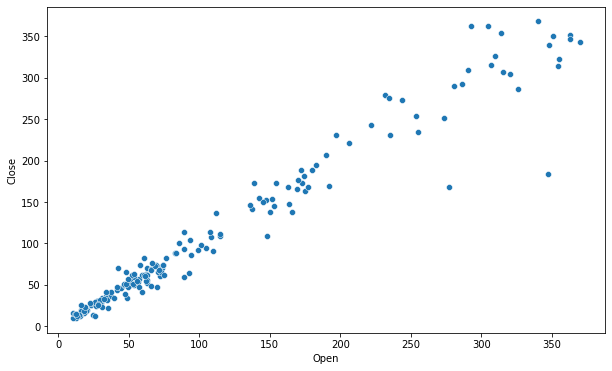

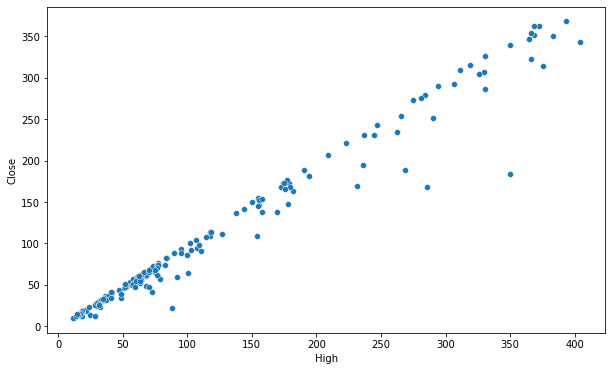

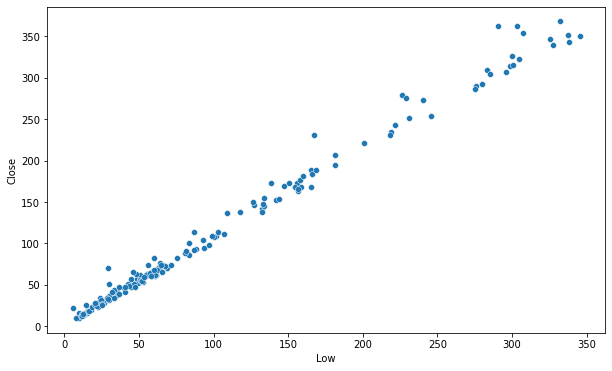

In [154]:
for col in dataset.columns[:-4]:
  sns.scatterplot(data=dataset,x=dataset[col],y='Close')
  plt.show()